Visualizing A, B, and C:


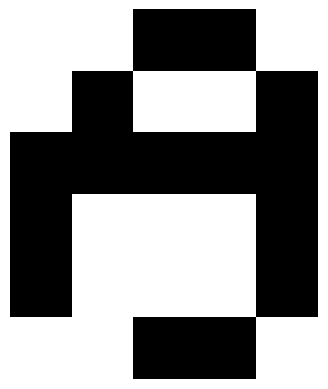

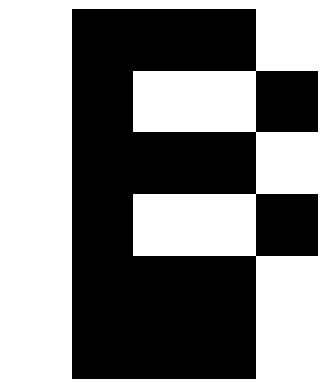

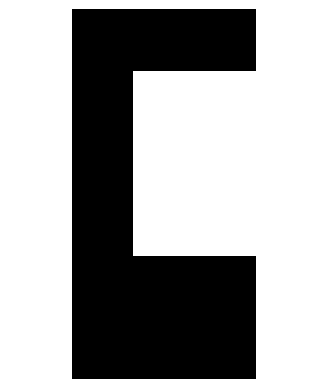

One-hot vectors:
[[[0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0]]

 [[0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0]]

 [[0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0]]]

Labels:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[ 1.08525014e+00 -1.59815520e+00 -1.19059038e+00 -1.45502147e+00
  -1.75437935e+00]
 [ 1.44962218e-01 -1.50240578e-01 -7.67518150e-01  1.17180572e-01
   9.70313340e-01]
 [-1.31771277e+00  8.54821756e-02  4.54268058e-01 -6.86230485e-01
  -7.59680024e-01]
 [ 1.47424893e+00 -8.59592341e-01 -1.88642256e+00  1.15084025e+00
  -2.19182114e-01]
 [-8.47609679e-01  1.38135220e+00  2.35066589e+00 -2.37255347e+00
  -3.55067096e-01]
 [ 1.52127269e+00 -4.64319379e-01 -5.26748956e-01 -4.09917607e-01
  -5.81255862e-01]
 [-6.46320814e-01 -9.95407024e-01  1.34669102e+00 -1.74632674e-01
   1.29414086e+00]
 [ 4.63107281e-01 -8.57708936e-02 -1.01839419e+00 -1.28600566e-02
  -7.83329337e-01]
 [ 1.15630590e+00 -3.11833726e-01  2.59399860e-03  2.59285487e-01
  

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for A, B, and C
A = np.array([
    [0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1],
    [1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0]
])

B = np.array([
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0]
])

C = np.array([
    [0, 1, 1, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0]
])

# Function to visualize the data
def visualize_letter(letter):
    plt.imshow(letter, cmap='binary')
    plt.axis('off')
    plt.show()

# Visualize A, B, and C
print("Visualizing A, B, and C:")
for letter in [A, B, C]:
    visualize_letter(letter)

# Convert patterns to one-hot vectors
X = np.array([A.reshape(1, 30), B.reshape(1, 30), C.reshape(1, 30)])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

print("One-hot vectors:")
print(X)
print("\nLabels:")
print(y)

# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))
# Creating the Feed forward neural network
# 1 Input layer(1, 30), # 1 hidden layer (1, 5), # 1 output layer(3, 3)
def f_forward(x, w1, w2):
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# out put of layer 2
    
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    return(a2)

# initializing the weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))
    
# for loss we will be using mean square error(MSE)
def loss(out, Y):
    s =(np.square(out-Y))
    s = np.sum(s)/len(y)
    return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
    # Output layer
    z2 = a1.dot(w2)# input of out layer
    a2 = sigmoid(z2)# output of out layer
    # error in output layer
    d2 =(a2-y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    # Updating parameters
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
    return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
    acc =[]
    losss =[]
    for j in range(epoch):
        l =[]
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return(acc, losss, w1, w2)

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k = i
        if(k == 0):
            print("Image is of letter A.")
        elif(k == 1):
            print("Image is of letter B.")
        else:
            print("Image is of letter C.")
        plt.imshow(x.reshape(5, 6))
        plt.show()

w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

Visualizing A, B, and C:


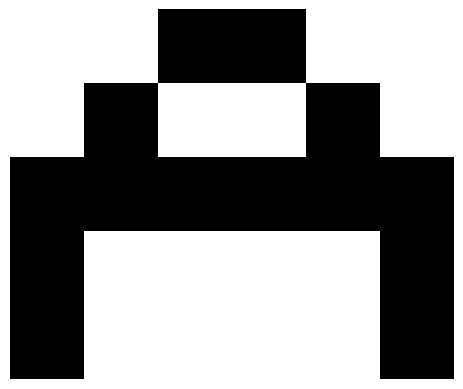

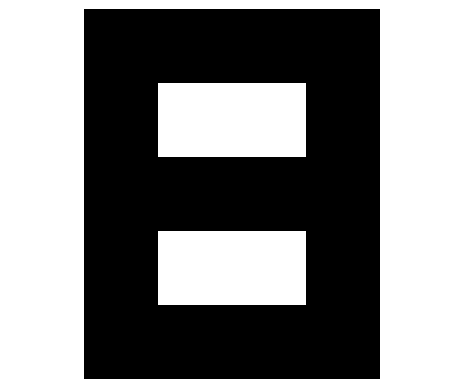

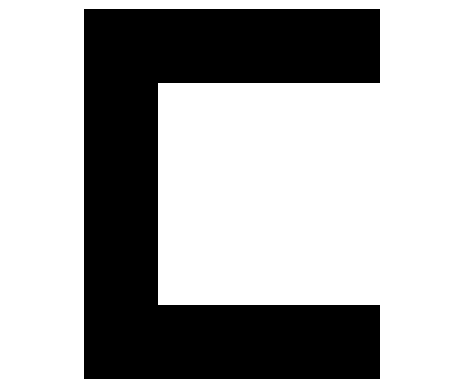

One-hot vectors:
[[[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]]

 [[0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]]

 [[0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]]]

Labels:
[[1 0 0]
 [0 1 0]
 [0 0 1]]
epochs: 1 ======== acc: 62.91%
epochs: 2 ======== acc: 65.89%
epochs: 3 ======== acc: 68.39%
epochs: 4 ======== acc: 70.59%
epochs: 5 ======== acc: 72.55%
epochs: 6 ======== acc: 74.31%
epochs: 7 ======== acc: 75.89%
epochs: 8 ======== acc: 77.31%
epochs: 9 ======== acc: 78.56%
epochs: 10 ======== acc: 79.68%
epochs: 11 ======== acc: 80.66%
epochs: 12 ======== acc: 81.52%
epochs: 13 ======== acc: 82.27%
epochs: 14 ======== acc: 82.93%
epochs: 15 ======== acc: 83.51%
epochs: 16 ======== acc: 84.01%
epochs: 17 ======== acc: 84.45%
epochs: 18 ======== acc: 84.84%
epochs: 19 ======== acc: 85.18%
epochs: 20 ======== acc: 85.48%
epochs: 21 ======== acc: 85.75%
epochs: 22 ======== acc: 85.99%
epochs: 23 ======== acc: 86.20%
epochs: 24 ======== a

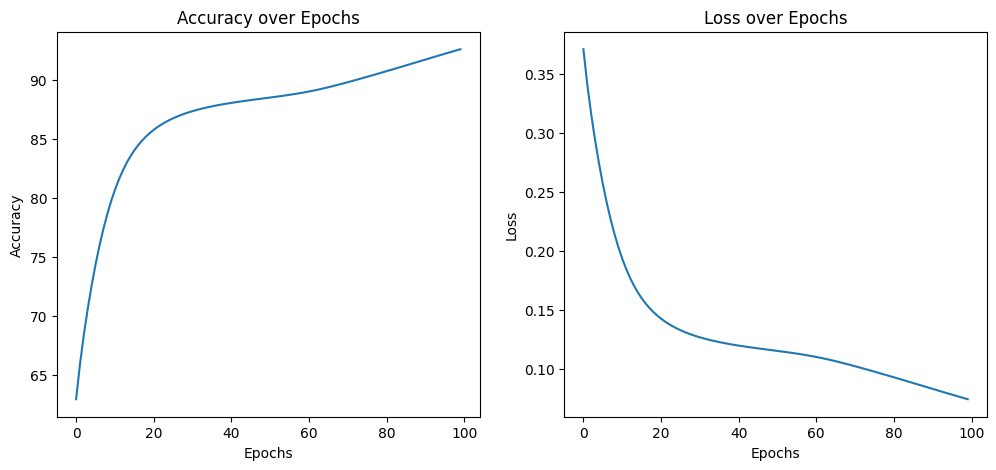

Trained weights:
w1:
 [[-0.32752615  0.34827947 -1.23141835 -0.64367525 -0.21691967]
 [ 0.1558382  -1.97707026  0.40378535 -0.24009067  2.46067386]
 [ 0.43615298 -0.10248267  1.24149611 -0.62507917 -1.05345671]
 [ 0.51812791 -0.16460628 -0.03534756 -0.06886919 -1.14331845]
 [ 0.28345682 -0.47991539 -0.70028821 -0.62963169  0.84887316]
 [-0.22947415 -0.32068764 -0.02713799  0.50451654  0.83967472]
 [-0.81304508  0.45862469 -0.46187773 -0.74368336  0.99704558]
 [-0.90561753  0.93642949  1.66857359  0.07217687 -0.60643296]
 [ 0.13055027 -0.07526409  0.30834754  0.1133391  -0.49849335]
 [-0.82849054  0.56716293  0.93846092 -0.60072434  0.27051062]
 [-1.75688823  1.0935707   1.93233109  0.93390051 -0.43719127]
 [-0.58979324 -0.72613286 -0.76823267  1.92170946 -0.16249073]
 [ 0.2068041  -0.04543347  0.28770471 -0.54478026 -0.64523575]
 [-0.79787429  0.17814244 -0.65307429 -0.30108786 -0.86295189]
 [-0.95519017  0.68445921 -0.71672808  1.60817047 -0.93895591]
 [ 0.69044948 -0.35912649 -0.2664

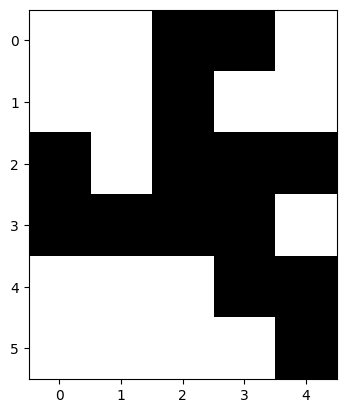


Predicting letter B:
Image is of letter B.


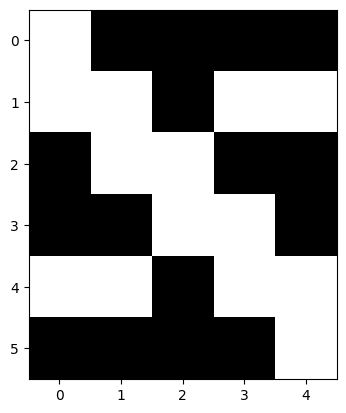


Predicting letter C:
Image is of letter C.


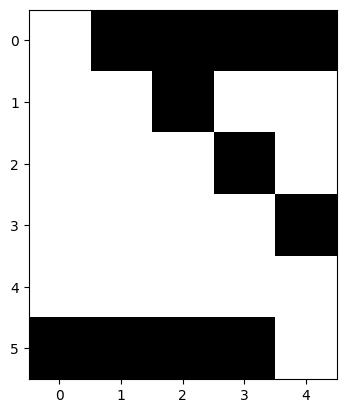


Predicting an arbitrary pattern:
Image is of letter B.


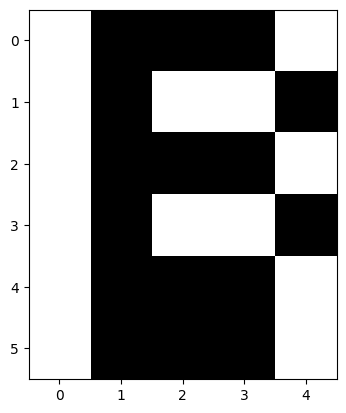

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for A, B, and C
A = np.array([
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1]
])

B = np.array([
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0]
])

C = np.array([
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0]
])

# Function to visualize the data
def visualize_letter(letter):
    plt.imshow(letter, cmap='binary')
    plt.axis('off')
    plt.show()

# Visualize A, B, and C
print("Visualizing A, B, and C:")
for letter in [A, B, C]:
    visualize_letter(letter)

# Convert patterns to one-hot vectors
X = np.array([A.reshape(1, 30), B.reshape(1, 30), C.reshape(1, 30)])
y = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

print("One-hot vectors:")
print(X)
print("\nLabels:")
print(y)

# Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Creating the Feed forward neural network
def f_forward(x, w1, w2):
    # Hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    
    # Output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

# Initializing the weights randomly
def generate_wt(x, y):
    return np.random.randn(x, y)

# Loss function (Mean Squared Error)
def loss(out, Y):
    return np.sum((out - Y) ** 2) / len(Y)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
    # Forward pass
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    # Backward pass
    d2 = (a2 - y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))
    
    # Gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    # Updating parameters
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)
    
    return w1, w2

def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losss = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        print(f"epochs: {j + 1} ======== acc: {(1-(sum(l)/len(x)))*100:.2f}%")
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = np.max(Out)
    k = np.argmax(Out)
    if k == 0:
        print("Image is of letter A.")
    elif k == 1:
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
    plt.imshow(x.reshape(6, 5), cmap='binary')
    plt.show()

# Initialize weights
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

# Train the network
acc, losss, w1, w2 = train(X, y, w1, w2, alpha=0.1, epoch=100)

# Plot accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.title('Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.subplot(1, 2, 2)
plt.plot(losss)
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

# Print trained weights
print("Trained weights:")
print("w1:\n", w1)
print("\nw2:\n", w2)

# Predict examples
print("\nPredicting letter A:")
predict(X[0], w1, w2)

print("\nPredicting letter B:")
predict(X[1], w1, w2)

print("\nPredicting letter C:")
predict(X[2], w1, w2)

# Example of predicting an arbitrary pattern
print("\nPredicting an arbitrary pattern:")
arbitrary_pattern = np.array([[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0]])
predict(arbitrary_pattern, w1, w2)

One-hot vectors:
[[[0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1]]

 [[0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0]]

 [[0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0]]

 [[0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0]]]

Labels:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
epochs: 1 ======== acc: 61.63%
epochs: 2 ======== acc: 67.27%
epochs: 3 ======== acc: 71.98%
epochs: 4 ======== acc: 75.71%
epochs: 5 ======== acc: 78.34%
epochs: 6 ======== acc: 80.07%
epochs: 7 ======== acc: 81.24%
epochs: 8 ======== acc: 82.10%
epochs: 9 ======== acc: 82.78%
epochs: 10 ======== acc: 83.34%
epochs: 11 ======== acc: 83.81%
epochs: 12 ======== acc: 84.21%
epochs: 13 ======== acc: 84.56%
epochs: 14 ======== acc: 84.86%
epochs: 15 ======== acc: 85.13%
epochs: 16 ======== acc: 85.38%
epochs: 17 ======== acc: 85.62%
epochs: 18 ======== acc: 85.84%
epochs: 19 ======== acc: 86.06%
epochs: 20 ======== acc: 86.27%
epochs: 21 ======== acc: 86.47%
ep

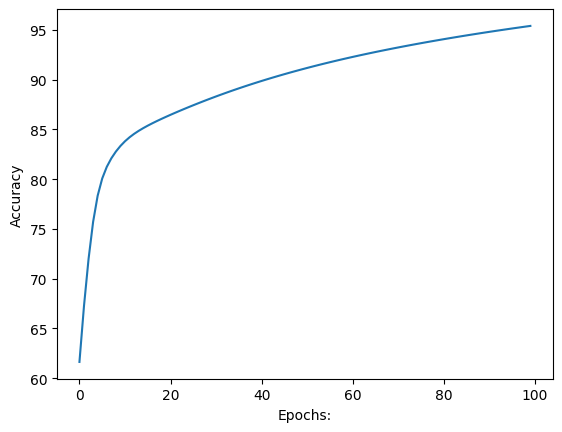

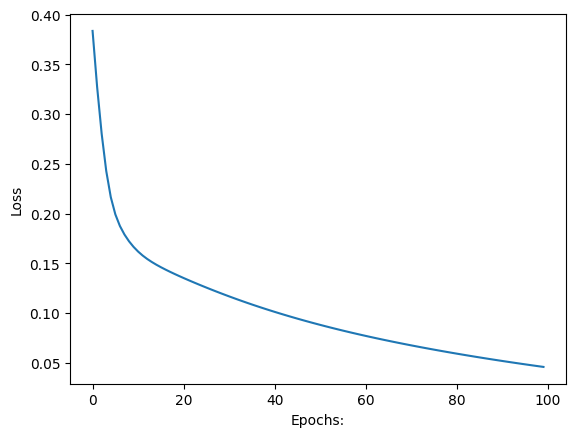

Trained weights:
w1:
 [[ 0.11209503 -1.81814308 -1.18041404 -0.18153393 -0.12233722]
 [-1.2049224   0.09575443 -0.75493582  1.85707309  0.15652181]
 [-0.47991751  0.32456843  0.08866638 -1.08860223 -0.30955799]
 [ 0.86414162 -1.24560313 -1.11091131 -1.13904229  0.72179714]
 [-0.93072189 -0.58267108  2.1163915   0.3053799   0.17354438]
 [ 0.117013   -0.68011809  0.58854246  1.11583784  0.39053849]
 [-0.72876155  0.82104928  1.68767775  0.04524021 -0.2470241 ]
 [-0.93082542 -0.66753217 -0.85517652 -0.58055586  1.18792189]
 [ 1.68210426  0.05033121  0.96153337  0.02681258 -0.86173806]
 [-1.36219155 -1.68146654 -0.70885764 -1.27005076 -1.26706022]
 [-0.53045502  1.57032919  0.52949243  1.79932345  0.31564586]
 [-0.35374921  0.81816686 -0.6338334   0.44838453  0.37872816]
 [ 1.01471008 -0.37782943  1.71510791 -0.47785187  0.81634857]
 [ 1.02748697 -1.75163743  1.29782495  0.30866561 -1.30814574]
 [-1.70626384  1.43559634  1.21951059 -1.0340491  -0.46052223]
 [ 1.61983199  0.24669891 -1.7215

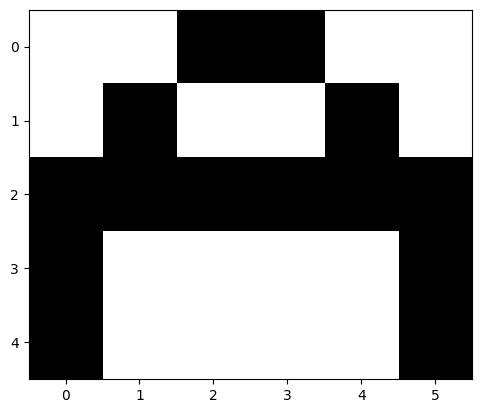


Predicting letter B:
Image is of letter B.


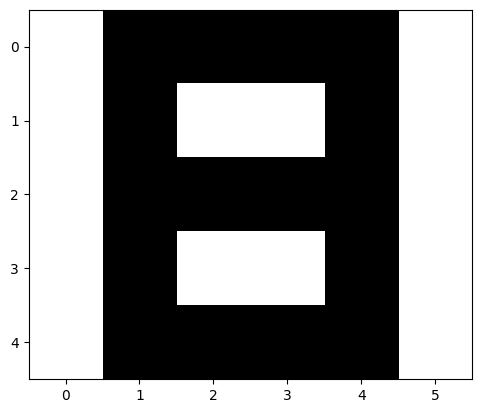


Predicting letter C:
Image is of letter C.


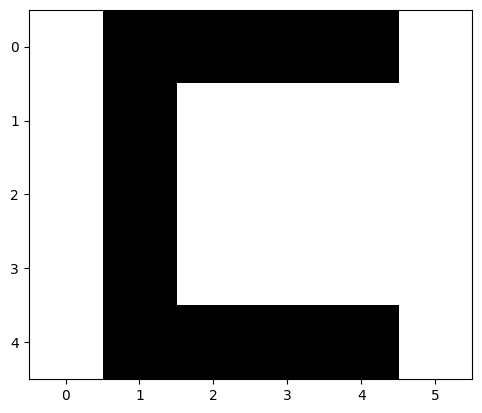


Predicting letter D:
Image is of letter D.


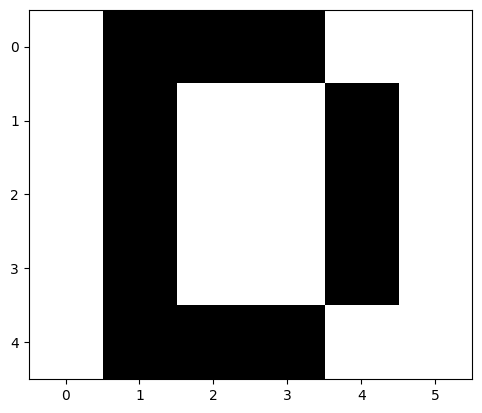


Predicting an arbitrary pattern (E):
Image is of letter C.


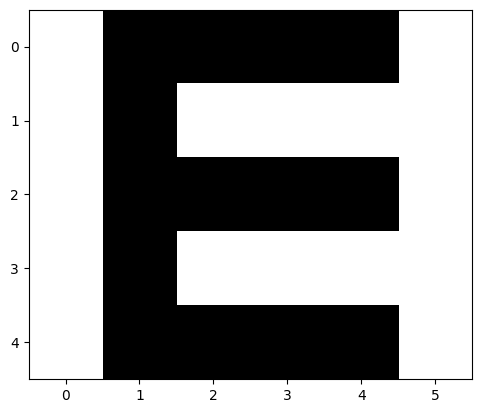

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for A, B, C, and D
A = np.array([
    [0, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 1]
])

B = np.array([
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 0]
])

C = np.array([
    [0, 1, 1, 1, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0]
])

D = np.array([
    [0, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0]
])

# Convert patterns to one-hot vectors
X = np.array([A.reshape(1, 30), B.reshape(1, 30), C.reshape(1, 30), D.reshape(1, 30)])
y = np.array(y)

print("One-hot vectors:")
print(X)
print("\nLabels:")
print(y)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def f_forward(x, w1, w2):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return a2

def generate_wt(x, y):
    return np.random.randn(x, y)

def loss(out, Y):
    return np.sum((out - Y) ** 2) / len(Y)

def back_prop(x, y, w1, w2, alpha):
    z1 = x.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    
    d2 = (a2 - y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), (np.multiply(a1, 1-a1)))
    
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
    
    w1 = w1 - (alpha * w1_adj)
    w2 = w2 - (alpha * w2_adj)
    
    return w1, w2

def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    losss = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append(loss(out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        print(f"epochs: {j + 1} ======== acc: {(1-(sum(l)/len(x)))*100:.2f}%")
        acc.append((1-(sum(l)/len(x)))*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2

def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = np.max(Out)
    k = np.argmax(Out)
    if k == 0:
        print("Image is of letter A.")
    elif k == 1:
        print("Image is of letter B.")
    elif k == 2:
        print("Image is of letter C.")
    else:
        print("Image is of letter D.")
    plt.imshow(x.reshape(5, 6), cmap='binary')
    plt.show()

# Initialize weights
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 4)  # Changed to 4 outputs

import matplotlib.pyplot as plt1
# Train the network
acc, losss, w1, w2 = train(X, y, w1, w2, alpha=0.1, epoch=100)

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()
# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()

# Print trained weights
print("Trained weights:")
print("w1:\n", w1)
print("\nw2:\n", w2)

# Predict examples
print("\nPredicting letter A:")
predict(X[0], w1, w2)

print("\nPredicting letter B:")
predict(X[1], w1, w2)

print("\nPredicting letter C:")
predict(X[2], w1, w2)

print("\nPredicting letter D:")
predict(X[3], w1, w2)

# Example of predicting an arbitrary pattern (E)
print("\nPredicting an arbitrary pattern (E):")
E = np.array([0, 1, 1 ,1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]).reshape(1, 30)
predict(E, w1, w2)